# ПОСЛЕДНЯЯ ВЕРСИЯ КЛАССОВ МОДЕЛЕЙ

In [1]:
import joblib
from typing import Any, Dict, List, Tuple, Type, Union
import numpy as np
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.utils import all_estimators
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.neighbors import NearestNeighbors
from Levenshtein import distance as lev_dist
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, v_measure_score, adjusted_rand_score
# Импорт метрик для оценки модели (scores)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score, normalized_mutual_info_score,
    fowlkes_mallows_score
)
# Импорт метрик ошибок (errors)
from sklearn.metrics import (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)

scores = (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score
)

errors = (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import plot_tree, BaseDecisionTree

## Рабочие классы (убраны отдельные методы метрик)

In [3]:
class Model:
    def __init__(self, model: Type[BaseEstimator] = None):
        """
        Initializes an instance of the Model class.

        Parameters:
        model (Type[BaseEstimator], optional): The model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.linear_model import LogisticRegression
        >>> model_instance = Model(model=LogisticRegression())
        """
        all_models = self.__check_model_type()

        if model is not None:
            assert isinstance(model, tuple(all_models)), ('Incorrect input model type. '
                                                          f'Should be one of {type(self)} models from sklearn')
        self.__model: BaseEstimator = model  # Приватизируем атрибут model

    @property
    def model(self):
        return self.__model

    def __check_model_type(self) -> List[Type[BaseEstimator]]:
        """
        Checks and returns the types of available models.

        Returns:
        --------
        List[Type[BaseEstimator]]: A list of model types.

        Example:
        --------
        >>> model_instance = Model()
        >>> model_instance.__check_model_type()
        [<class 'sklearn.linear_model._logistic.LogisticRegression'>, ...]
        """

        self.__model_types_with_names: List[Tuple[str, Type[BaseEstimator]]] = all_estimators(
            type_filter=type(self).__name__.lower())
        all_models = [t[1] for t in self.__model_types_with_names]
        return all_models

    def fit(self, X: Any, y: Any = None, *args: Any, **kwargs: Any) -> None:
        """
        Fits the model to the data.

        Parameters:
        -----------
        X : Any
            Training data.
        y : Any, optional
            Target values.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> model_instance.fit(X_train, y_train)
        """
        assert self.__model is not None, "Model is not defined."
        self.__model.fit(X, y, *args, **kwargs)

    def predict(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        """
        Predicts using the model.

        Parameters:
        -----------
        X : Any
            Data to predict.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Any: Predicted values.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> predictions = model_instance.predict(X_test)
        """
        assert self.__model is not None, "Model is not defined."
        return self.__model.predict(X, *args, **kwargs)

    def predict_proba(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        """
        Predicts class probabilities using the model.

        Parameters:
        -----------
        X : Any
            Data to predict.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Any: Predicted class probabilities.

        Raises:
        -------
        AssertionError: If the model is not defined or is not a classifier model.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> probabilities = model_instance.predict_proba(X_test)
        """
        classifier_models = [t[1] for t in all_estimators(type_filter='classifier')]
        assert isinstance(self.__model, tuple(classifier_models)), ('Incorrect model type for predict_proba. '
                                                                    f'Should be one of {classifier_models}')
        return self.__model.predict_proba(X, *args, **kwargs)

    def save_model(self, path: str, *args: Any, **kwargs: Any) -> None:
        """
        Saves the model to a file.

        Parameters:
        -----------
        path : str
            The path to save the model.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> model_instance.save_model('model.pkl')
        """
        assert self.__model is not None, "Model is not defined."
        joblib.dump(self, path, *args, **kwargs)  # Сохраняем текущий объект Model

    @classmethod
    def load_model(cls, path: str, *args: Any, **kwargs: Any) -> 'Model':
        """
        Loads a model from a file.

        Parameters:
        -----------
        path : str
            The path to load the model from.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Model: An instance of the Model class with the loaded model.

        Raises:
        -------
        ValueError: If the loaded object is not an instance of the Model class.

        Example:
        --------
        >>> loaded_model_instance = Model.load_model('model.pkl')
        """
        try:
            model_instance = joblib.load(path, *args, **kwargs)
            assert isinstance(model_instance, cls), "Loaded object is not an instance of the expected class."
            return model_instance
        except:
            raise ValueError("You're tying to load incorrect model")

    def fit_all(self, X: Any, y: Any = None) -> Tuple[
        Dict[str, 'Model'], Dict[str, Exception]]:
        """
        Fits all available models to the data.

        Parameters:
        -----------
        X : Any
            Training data.
        y : Any, optional
            Target values.

        Returns:
        --------
        Tuple[Dict[str, Model], Dict[str, Exception]]: A tuple containing a dictionary of fitted models and a dictionary of errors.

        Example:
        --------
        >>> model_instance = Model()
        >>> fitted_models, errors = model_instance.fit_all(X_train, y_train)
        """
        fitted_models: Dict[str, 'Model'] = {}
        error_fitting: Dict[str, Exception] = {}

        for model_name, model_type in self.__model_types_with_names:
            try:
                model_instance = model_type()
                model_instance.fit(X, y)
                wrapped_model = self.__class__(model_instance)
                fitted_models[model_name] = wrapped_model
            except Exception as e:
                error_fitting[model_name] = e

        return fitted_models, error_fitting

    def get_params(self, *args: Any, **kwargs: Any) -> Dict[str, Any]:
        """
        Gets parameters of the model.

        Parameters:
        -----------
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Dict[str, Any]: Model parameters.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> params = model_instance.get_params()
        """
        assert self.__model is not None, "Model is not defined."
        return self.__model.get_params(*args, **kwargs)

In [4]:
class Regressor(Model):
    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Regressor class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The regression model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.linear_model import LinearRegression
        >>> regressor_instance = Regressor(model=LinearRegression())
        """
        super().__init__(model)
    
    def report(self, y_true, y_pred):
        """
        Generates a report of regression metrics based on the true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted target values.

        Returns:
        --------
        dict : A dictionary containing various regression metrics:
            - 'r2_score': R^2 (coefficient of determination) regression score.
            - 'mean_absolute_error': Mean absolute error regression loss.
            - 'mean_squared_error': Mean squared error regression loss.
            - 'max_error': Maximum residual error.
            - 'mean_absolute_percentage_error': Mean absolute percentage error regression loss.
            - 'median_absolute_error': Median absolute error regression loss.
            - 'mean_squared_log_error': Mean squared logarithmic error regression loss.
            - 'd2_absolute_error_score': D^2 (coefficient of determination) regression score based on absolute error.
            - 'root_mean_squared_error': Root mean squared error regression loss.
            - 'root_mean_squared_log_error': Root mean squared logarithmic error regression loss.

        Example:
        --------
        >>> y_true = [3.0, -0.5, 2.0, 7.0]
        >>> y_pred = [2.5, 0.0, 2.0, 8.0]
        >>> regressor_instance = Regressor(model=LinearRegression())
        >>> metrics_report = regressor_instance.report(y_true, y_pred)
        >>> print(metrics_report)
        {'r2_score': 0.9486081370449679, ...}
        """

        metrics = {
            'r2_score': r2_score(y_true, y_pred),
            'mean_absolute_error': mean_absolute_error(y_true, y_pred),
            'mean_squared_error': mean_squared_error(y_true, y_pred),
            'max_error': max_error(y_true, y_pred),
            'mean_absolute_percentage_error': mean_absolute_percentage_error(y_true, y_pred),
            'median_absolute_error': median_absolute_error(y_true, y_pred),
            'mean_squared_log_error': mean_squared_log_error(y_true, y_pred),
            'd2_absolute_error_score': d2_absolute_error_score(y_true, y_pred),
            'root_mean_squared_error': np.sqrt(mean_squared_error(y_true, y_pred)),
            'root_mean_squared_log_error': np.sqrt(mean_squared_log_error(y_true, y_pred)),
        }

        return metrics

In [5]:
class Classifier(Model):
    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Classifier class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The classification model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.ensemble import RandomForestClassifier
        >>> classifier_instance = Classifier(model=RandomForestClassifier())
        """
        super().__init__(model)

    

    def roc_auc_plot(self, y_true: Any, y_score: Any, *args: Any,
                     **kwargs: Any) -> None:
        """
        Plots the ROC (Receiver Operating Characteristic) curve.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_score : array-like
            Predicted scores.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_score = [0.1, 0.4, 0.35, 0.8]
        >>> classifier_instance.roc_auc_plot(y_true, y_score)
        """
        fpr, tpr, _ = roc_curve(y_true, y_score, *args, **kwargs)
        roc_auc = roc_auc_score(y_true, y_score)

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

    def confusion_matrix_display(self, x_test: Any, y_test: Any, *args: Any,
                                 **kwargs: Any) -> ConfusionMatrixDisplay:
        """
        Displays the Confusion Matrix.

        Parameters:
        -----------
        x_test : Any
            Test data.
        y_test : Any
            True target values.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> x_test = [[0, 1], [1, 0]]
        >>> y_test = [0, 1]
        >>> classifier_instance.confusion_matrix_display(x_test, y_test)
        """
        ConfusionMatrixDisplay.from_estimator(self.model, x_test, y_test, *args, **kwargs)
        plt.show()
    
    def __gini(self, y_true, y_pred):
        """
        Computes the Gini coefficient.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted values.

        Returns:
        --------
        float : Gini coefficient.
        """

        return 2 * roc_auc_score(y_true, y_pred) - 1
    
    def __get_grid(self, data):
        """
        Generate a grid for plotting decision boundaries.

        Parameters:
        -----------
        data : array-like
            Input data for which to generate the grid.

        Returns:
        --------
        tuple: Meshgrid arrays for plotting.
        """

        x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
        y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
        return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    def test_tree_classification(self, X, y, cy=0, fit_clf=True):
        """
        Test and plot decision boundaries for a tree-based classifier.

        Parameters:
        -----------
        X : pd.DataFrame
            Input features.
        y : pd.DataFrame or pd.Series
            True target values.
        cy : array-like, optional
            Colors for plotting the scatter points. Defaults to 0.
        fit_clf : bool, optional
            If True, fit the classifier before plotting. Defaults to True.

        Returns:
        --------
        model: The fitted model, if fit_clf is True.

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> import pandas as pd
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier()
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.test_tree_classification(X, y, cy=y['target'])
        """

        valid_models = ('DecisionTreeClassifier', 'ExtraTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier')
        assert self.model.__class__.__name__ in valid_models, f'Model must be an instance of the tree class. Valid models: {valid_models}'
        assert isinstance(X, pd.DataFrame), f'Incorrect X paramnetr type. {type(X)} instead of {pd.DataFrame}'
        assert isinstance(y, (pd.DataFrame, pd.Series)), f'Incorrect y paramnetr type. {type(y)} instead of {pd.DataFrame | pd.Series}'

        xx, yy = self.__get_grid(X.values)

        if fit_clf:
            self.model.fit(X, y)

        predicted = self.model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
        plt.scatter(X.values[:, 0], X.values[:, 1], s=50, cmap='tab10', c=cy)
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.show()

        if fit_clf:
            return self.model
        
    def tree_plot(self, **kwargs):
        """
        Plot the tree structure of a decision tree model.

        Parameters:
        -----------
        kwargs : Additional keyword arguments for the tree plotting function. Possible parameters include:
            - feature_names : list of str
                Names of each of the features.
            - class_names : list of str or bool
                Names of each of the target classes. If True, shows the string representation of the class.
            - filled : bool
                When set to True, paint nodes to indicate the majority class for classification, extremity of values for regression, or purity of node for multi-output.
            - rounded : bool
                When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
            - proportion : bool
                When set to True, change the display of 'values' and/or 'samples' to be proportions and percentages instead of absolute numbers.
            - precision : int
                Number of decimal places to display.

        Returns:
        --------
        None

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier().fit(X, y)
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.tree_plot(feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
        """
        assert isinstance(self.model, BaseDecisionTree), 'Model must be an instance of the tree class'
        plot_tree(self.model, **kwargs)
        plt.show()
    
    def report(self, y_true, y_pred):
        """
        Generates a report of classification metrics based on the true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted target values.

        Returns:
        --------
        dict : A dictionary containing various classification metrics:
            - 'accuracy_score': Accuracy classification score.
            - 'precision_score': Precision classification score.
            - 'recall_score': Recall classification score.
            - 'f1_score': F1 score.
            - 'd2_absolute_error_score': D^2 (coefficient of determination) regression score based on absolute error.
            - 'ndcg_score': Normalized Discounted Cumulative Gain score.
            - 'dcg_score': Discounted Cumulative Gain score.
            - 'fbeta_score': F-beta score.
            - 'completeness_score': Completeness score.
            - 'homogeneity_score': Homogeneity score.
            - 'jaccard_score': Jaccard similarity coefficient score.
            - 'brier_score_loss': Brier score loss.
            - 'd2_tweedie_score': D^2 (coefficient of determination) regression score for Tweedie distribution.
            - 'cohen_kappa_score': Cohen's kappa score.
            - 'd2_pinball_score': D^2 (coefficient of determination) regression score based on pinball loss.
            - 'mutual_info_score': Mutual information score.
            - 'adjusted_mutual_info_score': Adjusted mutual information score.
            - 'average_precision_score': Average precision score.
            - 'label_ranking_average_precision_score': Label ranking average precision score.
            - 'balanced_accuracy_score': Balanced accuracy classification score.
            - 'top_k_accuracy_score': Top-k accuracy classification score.
            - 'roc_auc_score': ROC AUC score.
            - '__gini': Gini coefficient.

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_pred = [0.1, 0.4, 0.35, 0.8]
        >>> metrics_report = classifier_instance.report(y_true, y_pred)
        >>> print(metrics_report)
        {'accuracy_score': 0.75, ...}
        """

        metrics = [
            accuracy_score,
            precision_score,
            recall_score,
            f1_score,
            d2_absolute_error_score,
            ndcg_score,
            dcg_score,
            fbeta_score,
            completeness_score,
            homogeneity_score,
            jaccard_score,
            brier_score_loss,
            d2_tweedie_score,
            cohen_kappa_score,
            d2_pinball_score,
            mutual_info_score,
            adjusted_mutual_info_score,
            average_precision_score,
            label_ranking_average_precision_score,
            balanced_accuracy_score,
            top_k_accuracy_score,
            roc_auc_score,
            self.__gini
        ]

        result = {}
        
        for metric in metrics:
            try:
                result[metric.__name__] = metric(y_true, y_pred)
            except Exception as e:
                result[metric.__name__] = e
        result
        return result

In [6]:
class Cluster(Model):
    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Cluster class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The clustering model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.cluster import DBSCAN
        >>> classifier_instance = Classifier(model=DBSCAN())
        """
        super().__init__(model)

    @property
    def labels_(self):
        return self.model.labels_
    
    @property
    def n_clusters(self):
        return self.model.n_clusters

    def elbow_method(self, x_train: Any, max_k: int, change_n_clusters: bool=True) -> List[float]:
        """
        Apply the elbow method to determine the optimal number of clusters and optionally update the model.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        max_k : int
            Maximum number of clusters to consider.
        change_n_clusters : bool, optional
            If True, update the model's 'n_clusters' parameter to the optimal number and fit the model. Defaults to True.

        Returns:
        --------
        list : WCSS (within-cluster sum of squares) for each number of clusters.

        Example:
        --------
        >>> from sklearn.cluster import KMeans
        >>> cluster_instance = Cluster(model=KMeans())
        >>> wcss = cluster_instance.elbow_method(x_train, max_k=10)
        >>> print(wcss)
        [1234.56, 789.01, 456.78, ...]
        """
        assert isinstance(max_k, int), f'Incorrect max_k param type. {type(max_k)} instead of {int}'
        assert self.model.__class__.__name__  in ('BisectingKMeans', 'KMeans', 'MiniBatchKMeans'), \
        f"This model doesn't support the elbow method. Valid models: {('BisectingKMeans', 'KMeans', 'MiniBatchKMeans')}"


        default_num_clusters = self.model.n_clusters

        wcss = []
        for k in range(1, max_k + 1):
            self.model.n_clusters = k
            model = self.model.fit(x_train)
            wcss.append(model.inertia_)

        n_clust = self.__elbow_method_best_k(wcss)
        if change_n_clusters:
            self.model.n_clusters = n_clust
            self.model.fit(x_train)
            print(f"Your model's parameter 'n_clusters' was changed to optimal: {n_clust} and model was fitted on it.")
        else: 
            self.model.n_clusters = default_num_clusters

        return wcss

    def elbow_method_plot(self, wcss: Union[List[float], Tuple[float, ...]]) -> None:
        """
        Plot the results of the elbow method.

        Parameters:
        -----------
        wcss : list or tuple
            WCSS values for different numbers of clusters.

        Returns:
        --------
        None

        Example:
        --------
        >>> cluster_instance.elbow_method_plot(wcss)
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss param type. {type(wcss)} instead of {list | tuple}'

        plt.figure(figsize=(10, 6))
        plt.grid(True)
        plt.plot(range(1, len(wcss) + 1), wcss, marker='o', mfc='red')
        plt.title('Selecting the number of clusters using the elbow method')
        plt.xlabel('num clusters')
        plt.ylabel('WCSS (error)')
        plt.xticks(range(1, len(wcss) + 1))
        plt.show()

    def __elbow_method_best_k(self, wcss: Union[List[float], Tuple[float, ...]]) -> Union[int, str]:
        """
        Determine the best number of clusters using the elbow method with a given threshold.

        Parameters:
        -----------
        wcss : list or tuple
            WCSS values for different numbers of clusters.

        Returns:
        --------
        int : Optimal number of clusters.
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss parameter type. {type(wcss)} instead of {list | tuple}'
        assert len(wcss) >= 3, 'max_k len must be >= 3'

        # подробное описание работы алгоритма в файле про кластеризацию и метрики качества
        diff = np.diff(wcss)
        diff_r = diff[1:] / diff[:-1]
        k_opt = range(1, len(wcss))[np.argmin(diff_r)+1]

        return k_opt

    def __dunn_index(self, x_train: Any, labels: Any) -> float:
        """
        Calculate the Dunn Index for the given data and labels.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        labels : array-like
            Cluster labels.

        Returns:
        --------
        float : Dunn Index.
        """
        clusters = np.unique(labels)
        if len(clusters) < 2:
            return 0

        distances = cdist(x_train, x_train)
        intra_cluster_dists = [np.max(distances[labels == cluster]) for cluster in clusters]
        inter_cluster_dists = [np.min(distances[labels == c1][:, labels == c2])
                               for i, c1 in enumerate(clusters) for c2 in clusters[i + 1:]]

        return np.min(inter_cluster_dists) / np.max(intra_cluster_dists)
    
    def __smape(self, y_true, y_pred):
        """
        Calculate the Symmetric Mean Absolute Percentage Error (SMAPE) between true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True values.
        y_pred : array-like
            Predicted values.

        Returns:
        --------
        float : SMAPE value.
        """

        return np.mean(2 * np.abs(y_pred - y_true) / (y_true + y_pred))
    
    def __plot_dendrogram(self, model, **kwargs):
        """
        Generate the linkage matrix and plot the dendrogram for hierarchical clustering.

        Parameters:
        -----------
        model : object
            Fitted clustering model.
        kwargs : additional keyword arguments
            Additional keyword arguments for the dendrogram plotting function. Possible parameters include:
            - truncate_mode : str, optional
                The truncation mode: 'level' or 'lastp'.
            - p : int, optional
                The number of levels to plot or the number of last clusters to show.
            - show_contracted : bool, optional
                Whether to show the contracted branches (default is False).
            - annotate_above : float, optional
                Annotate only the above threshold.
            - leaf_rotation : float, optional
                The rotation angle for leaf labels (default is 90).
            - leaf_font_size : float, optional
                The font size for leaf labels (default is 10).

        Returns:
        --------
        None
        """

        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)
        dendrogram(linkage_matrix, **kwargs)
    
    def dendrogram_plot(self, **kwargs):
        """
        Plot a dendrogram for the agglomerative clustering model.

        Parameters:
        -----------
        kwargs : additional keyword arguments
            Additional keyword arguments for the dendrogram plotting function. Possible parameters include:
            - truncate_mode : str, optional
                The truncation mode: 'level' or 'lastp'.
            - p : int, optional
                The number of levels to plot or the number of last clusters to show.
            - show_contracted : bool, optional
                Whether to show the contracted branches (default is False).
            - annotate_above : float, optional
                Annotate only the above threshold.
            - leaf_rotation : float, optional
                The rotation angle for leaf labels (default is 90).
            - leaf_font_size : float, optional
                The font size for leaf labels (default is 10).

        Returns:
        --------
        None

        Example:
        --------
        >>> from sklearn.cluster import AgglomerativeClustering
        >>> import numpy as np
        >>> model = AgglomerativeClustering().fit(np.random.rand(10, 2))
        >>> cluster_instance = Cluster(model)
        >>> cluster_instance.dendrogram_plot(truncate_mode='level', p=3)
        """

        assert self.model.__class__.__name__ in ('AgglomerativeClustering'), f'Only support AgglomerativeClustering'
        assert hasattr(self.model, 'children_'), f'The model must be fitted'

        plt.figure(figsize=(10, 8))
        plt.title('Hierarchical Clustering Dendrogram')
        self.__plot_dendrogram(self.model, **kwargs)
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()

    def report(self, x_train: Any, y_true: Any) -> Dict[str, float]:
        """
        Calculate various clustering metrics for the given training data and true labels.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        y_true : array-like
            True labels for the training data.

        Returns:
        --------
        dict : A dictionary containing various clustering metrics:
            - 'Silhouette Score': Silhouette coefficient for the clusters.
            - 'Calinski-Harabasz Index': Calinski-Harabasz score.
            - 'Davies-Bouldin Index': Davies-Bouldin score.
            - 'Dunn Index': Dunn index.
            - 'V-Measure': V-measure score.
            - 'Adjusted Rand Index': Adjusted Rand index.
            - 'Rand Index': Rand index.
            - 'Symmetric Mean Absolute Percentage Error (SMAPE)': Symmetric Mean Absolute Percentage Error.
            - 'Mean Absolute Percentage Error (MAPE)': Mean Absolute Percentage Error.
            - 'Normalized Mutual Information (NMI)': Normalized Mutual Information score.
            - 'Fowlkes-Mallows Index (FMI)': Fowlkes-Mallows score.
            - 'Calinski-Harabasz Index (CHI)': Calinski-Harabasz score.
            - 'Davies-Bouldin Index (DBI)': Davies-Bouldin score.

        Example:
        --------
        >>> from sklearn.datasets import make_blobs
        >>> from sklearn.cluster import KMeans
        >>> import numpy as np
        >>> X, y = make_blobs(n_samples=100, centers=3, random_state=42)
        >>> model = KMeans(n_clusters=3).fit(X)
        >>> cluster_instance = Cluster(model)
        >>> metrics_report = cluster_instance.report(X, y)
        >>> print(metrics_report)
        {'Silhouette Score': 0.68, 'Calinski-Harabasz Index': 345.31, ...}
        """

        labels = self.labels_
        metrics = {
            'Silhouette Score': silhouette_score(x_train, labels),
            'Calinski-Harabasz Index': calinski_harabasz_score(x_train, labels),
            'Davies-Bouldin Index': davies_bouldin_score(x_train, labels),
            'Dunn Index': self.__dunn_index(x_train, labels),
            'V-Measure': v_measure_score(y_true, labels),
            'Adjusted Rand Index': adjusted_rand_score(y_true, labels),
            'Rand Index': rand_score(y_true, labels),
            'Symmetric Mean Absolute Percentage Error (SMAPE)': self.__smape(y_true, labels),
            'Mean_Absolute_Percentage_Error': mean_absolute_percentage_error(y_true, labels),
            'Normalized Mutual Information (NMI)': normalized_mutual_info_score(y_true, labels),
            'Fowlkes-Mallows Index (FMI)': fowlkes_mallows_score(y_true, labels),
            'Calinski-Harabasz Index (CHI)': calinski_harabasz_score(x_train, labels),
            'Davies-Bouldin Index (DBI)': davies_bouldin_score(x_train, labels)
        }
        return metrics

## Регрессия

In [7]:
df = pd.read_csv("C:\projects\ML\DataBases\AAPL.csv")
df

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,9965321,-0.774858,-1.111,69.4256,"Feb 21, 14",0.000000
1,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,10337850,0.302061,0.438,69.1567,"Feb 24, 14",0.004378
2,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,8321050,-0.721010,-1.041,68.9153,"Feb 25, 14",-0.006074
3,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,9875898,-0.618575,-0.902,68.1373,"Feb 26, 14",-0.015040
4,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,10793903,1.355300,1.995,68.8615,"Feb 27, 14",0.004607
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2019-02-13,171.3900,172.4800,169.9200,170.1800,22490233,22490233,-0.710000,-0.415,171.0037,Feb 13,1.467017
1254,2019-02-14,169.7100,171.2615,169.3800,170.8000,21835747,21835747,0.620000,0.364,170.6527,Feb 14,1.476005
1255,2019-02-15,171.2500,171.7000,169.7500,170.4200,24626814,24626814,-0.380000,-0.222,170.4848,Feb 15,1.470496
1256,2019-02-19,169.7100,171.4400,169.4900,170.9300,18972826,18972826,0.510000,0.299,170.5200,Feb 19,1.477889


In [8]:
df = df[['open', 'high', 'low', 'close', 'changeOverTime', 'vwap']]
df

,open,high,low,close,changeOverTime,vwap
0,69.9727,70.2061,68.8967,68.9821,0.000000,69.4256
1,68.7063,69.5954,68.6104,69.2841,0.004378,69.1567
2,69.5245,69.5488,68.4239,68.5631,-0.006074,68.9153
3,68.7667,68.9492,67.7147,67.9446,-0.015040,68.1373
4,67.9170,69.4457,67.7738,69.2999,0.004607,68.8615
...,...,...,...,...,...,...
1253,171.3900,172.4800,169.9200,170.1800,1.467017,171.0037
1254,169.7100,171.2615,169.3800,170.8000,1.476005,170.6527
1255,171.2500,171.7000,169.7500,170.4200,1.470496,170.4848
1256,169.7100,171.4400,169.4900,170.9300,1.477889,170.5200


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

In [10]:
mod = Regressor()

In [11]:
reg = Regressor(LinearRegression())

In [12]:
reg.fit(x_train, y_train)

In [13]:
y_pred = reg.predict(x_test)

In [14]:
reg.report(y_test, y_pred)

{'r2_score': 0.9998304032732913,
 'mean_absolute_error': 0.1775765322049373,
 'mean_squared_error': 0.24259425944892138,
 'max_error': 7.575867519179894,
 'mean_absolute_percentage_error': 0.0014626294696807062,
 'median_absolute_error': 0.09419777362693083,
 'mean_squared_log_error': 2.6450116614551592e-05,
 'd2_absolute_error_score': 0.9941038134508251,
 'root_mean_squared_error': 0.4925385867614043,
 'root_mean_squared_log_error': 0.0051429676855441735}

## Классификация

In [15]:
data = load_iris()

In [16]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([X,y], axis=1)

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df0= df[df['target'] == 0]
df1 = df[df['target'] == 1]
df = pd.concat([df0, df1])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [19]:
Xcut = X[X.columns[2:4]]
Xcut.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [20]:
X = StandardScaler().fit_transform(df.iloc[:, :-1])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], random_state=42, shuffle=True, test_size=0.25)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = Classifier(RandomForestClassifier())

In [24]:
model.fit(x_train, y_train)

In [25]:
y_pred = model.predict(x_test)

In [26]:
model.report(y_test, y_pred)

c:\interpreter\Lib\site-packages\sklearn\metrics\_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'd2_absolute_error_score': 1.0,
 'ndcg_score': ValueError("Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got binary instead"),
 'dcg_score': ValueError("Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got binary instead"),
 'fbeta_score': TypeError("missing a required argument: 'beta'"),
 'completeness_score': 1.0,
 'homogeneity_score': 1.0,
 'jaccard_score': 1.0,
 'brier_score_loss': 0.0,
 'd2_tweedie_score': 1.0,
 'cohen_kappa_score': 1.0,
 'd2_pinball_score': 1.0,
 'mutual_info_score': 0.6859298002523728,
 'adjusted_mutual_info_score': 1.0,
 'average_precision_score': 1.0,
 'label_ranking_average_precision_score': ValueError('binary format is not supported'),
 'balanced_accuracy_score': 1.0,
 'top_k_accuracy_score': 1.0,
 'roc_auc_score': 1.0,
 '__gini': 1.0}

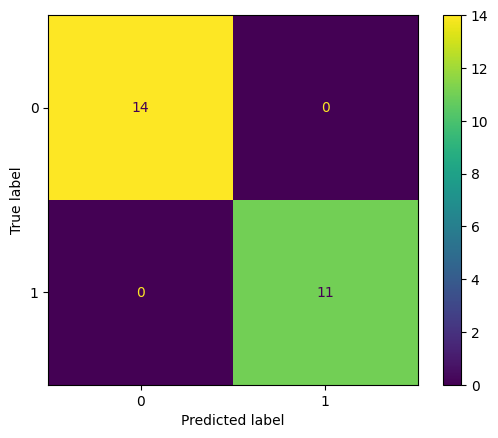

In [27]:
model.confusion_matrix_display(x_test, y_test)

c:\interpreter\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\interpreter\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


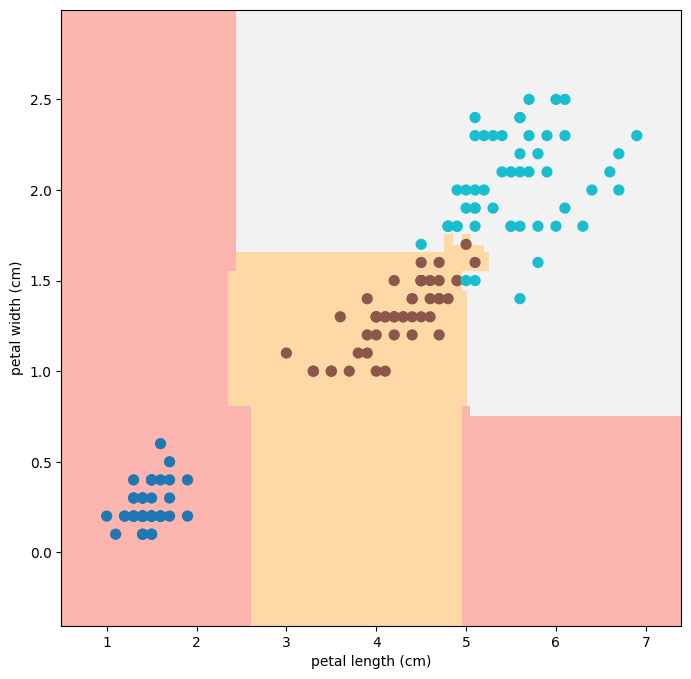

RandomForestClassifier()

In [28]:
model.test_tree_classification(Xcut, y, cy=y['target'])

In [29]:
model.tree_plot(filled=True)

AssertionError: Model must be an instance of the tree class

## Кластеризация

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

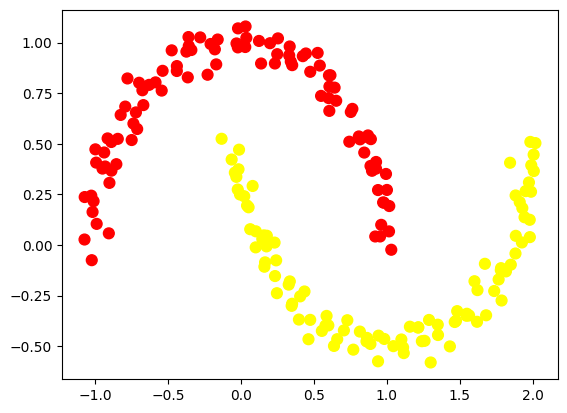

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60);

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([ 1.37667655e-16, -1.32671651e-16]), array([1., 1.]))

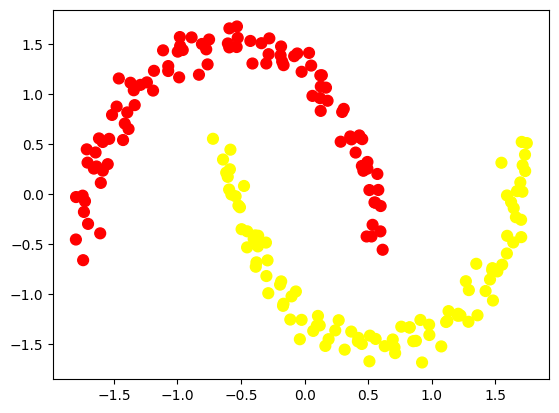

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', s=60);

In [ ]:
model = Cluster(AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average'))

In [ ]:
model.fit(X_scaled)

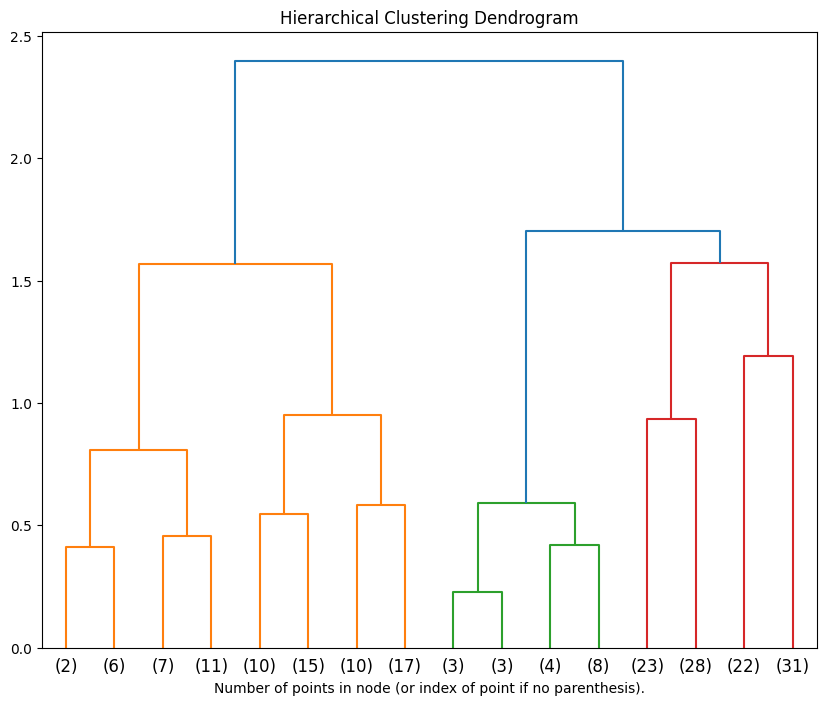

In [ ]:
model.dendrogram_plot(truncate_mode='level', p=3)

In [ ]:
model = Cluster(KMeans(2))

In [ ]:
wcss = model.elbow_method(X_scaled, 11)

Your model's parameter 'n_clusters' was changed to optimal: 2 and model was fitted on it.


In [ ]:
model.fit(X_scaled)

In [ ]:
model.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1])

In [ ]:
model.report(X_scaled, y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9824\1978898301.py:180: RuntimeWarning: invalid value encountered in divide
  return np.mean(2 * np.abs(y_pred - y_true) / (y_true + y_pred))


{'Silhouette Score': 0.4931959993588451,
 'Calinski-Harabasz Index': 278.193624591882,
 'Davies-Bouldin Index': 0.8057529734911772,
 'Dunn Index': 0.01299469270616325,
 'V-Measure': 0.4036078533253655,
 'Adjusted Rand Index': 0.5015977200103636,
 'Rand Index': 0.7508040201005025,
 'Symmetric Mean Absolute Percentage Error (SMAPE)': nan,
 'Mean_Absolute_Percentage_Error': 360287970189639.7,
 'Normalized Mutual Information (NMI)': 0.4036078533253654,
 'Fowlkes-Mallows Index (FMI)': 0.7496593231711579,
 'Calinski-Harabasz Index (CHI)': 278.193624591882,
 'Davies-Bouldin Index (DBI)': 0.8057529734911772}

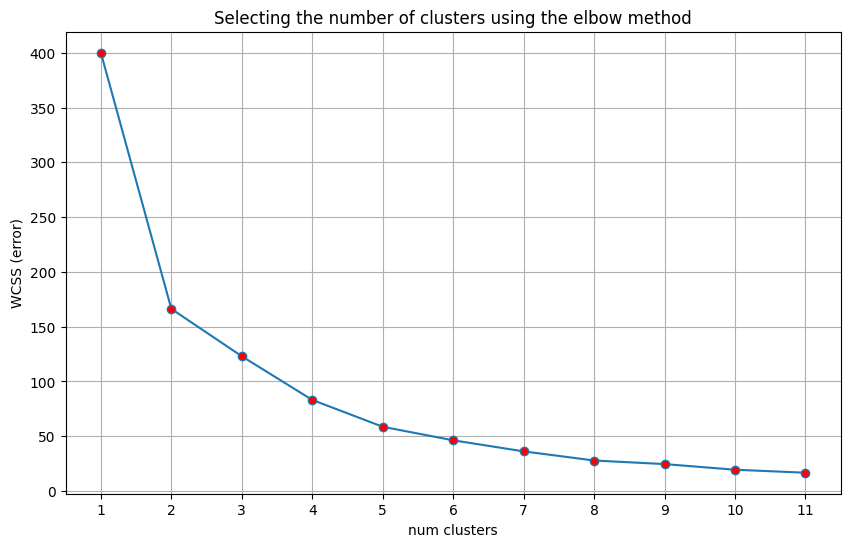

In [ ]:
model.elbow_method_plot(wcss)